In [18]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy requests

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
# import requests

# Load dataset
# url = 'https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci'
# df = pd.read_csv(url)

# df = requests.get(url)



# read local file from data folder
df = pd.read_csv('data/heart_cleveland_upload.csv')



# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [30]:
# Step 3: Handle Missing Values
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Handle missing values (drop or fill)
# For example, filling missing values with the median of the column
df.fillna(df.median(), inplace=True)


Missing values in each column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Step 4: Encode Categorical Variables
# List of categorical columns (example, adjust based on your dataset)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding for categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [35]:
print("\nColumns in the dataset:")
print(df.columns)



Columns in the dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [33]:
# Step 5: Normalize or Scale Numerical Features
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler to scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [36]:
# Step 6: Convert the Target Variable
# Ensure the target variable (assuming it's named 'num') is binary
# Convert the target variable to binary (0 or 1)

df['age'] = df['age'].apply(lambda x: 1 if x == 1 else 0)

# Output the cleaned and preprocessed dataset
print("\nPreprocessed dataset:")
print(df.head())


Preprocessed dataset:
   age       sex        cp  trestbps      chol       fbs   restecg   thalach  \
0    0  0.691095 -2.240629  1.596266 -0.257179  2.430427  1.010199 -0.812095   
1    0 -1.446980 -2.240629  0.468418 -0.160859 -0.411450 -1.003419  0.061157   
2    0 -1.446980 -2.240629  1.032342 -0.411292 -0.411450 -1.003419 -1.554358   
3    0  0.691095 -2.240629  0.355633  0.667499  2.430427  1.010199  1.065396   
4    0  0.691095 -2.240629 -1.223355 -0.700254 -0.411450  1.010199 -0.244481   

      exang   oldpeak     slope        ca      thal  condition  
0 -0.696419 -0.820813  0.643781  0.344824 -0.874292  -0.925338  
1 -0.696419  0.639470 -0.976583  1.411625 -0.874292  -0.925338  
2 -0.696419  1.326662  2.264145 -0.721976 -0.874292  -0.925338  
3 -0.696419  0.295874  0.643781  0.344824 -0.874292   1.080686  
4  1.435916  0.639470  0.643781 -0.721976 -0.874292  -0.925338  


# Step 2: Exploratory Data Analysis (EDA)
# Analyze the correlation between variables.
# Visualize the distribution of key features.
# Check class balance in the target variable.
# Perform feature selection based on correlation or domain understanding.





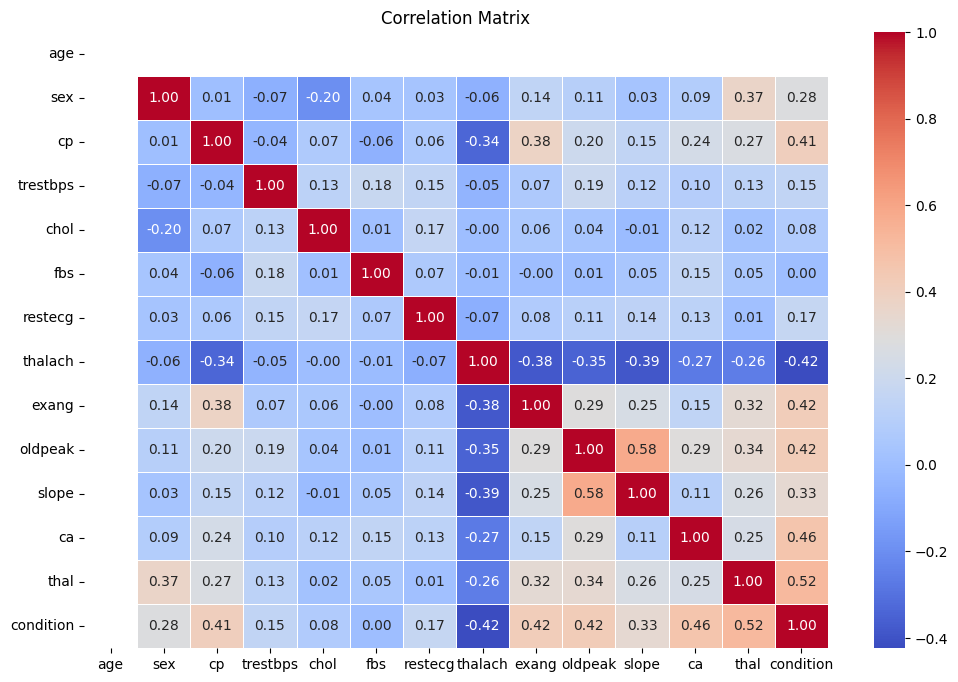

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2.1: Analyze Correlation Between Variables
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


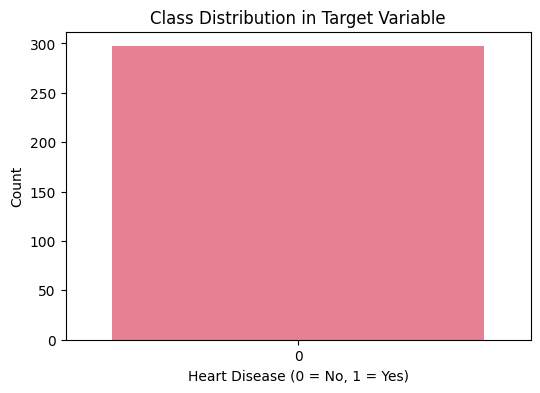

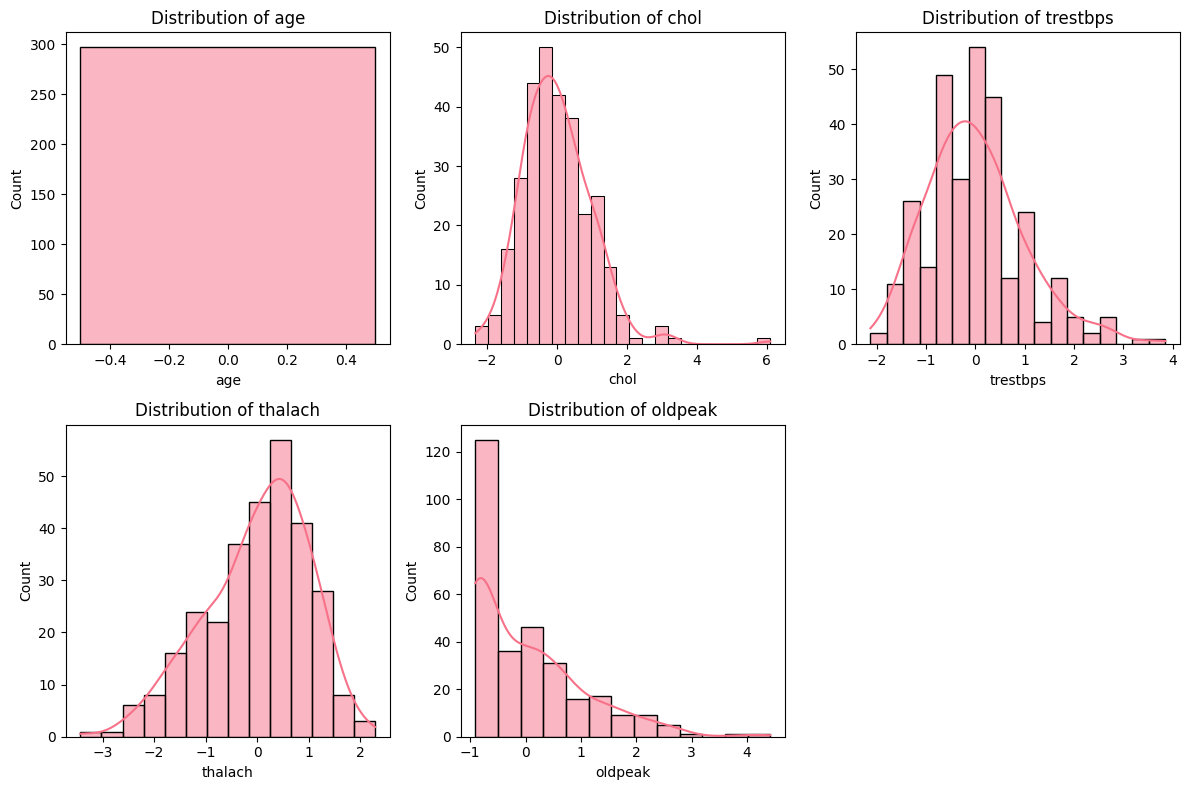

In [39]:
# Step 2.2: Visualize the Distribution of Key Features
# Plotting the distribution of the target variable ('num' or your actual target column)
plt.figure(figsize=(6, 4))
sns.countplot(x='age', data=df)
plt.title('Class Distribution in Target Variable')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of some key features (e.g., age, cholesterol)
key_features = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']  # You can select other relevant columns

plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Class distribution:
age
0    297
Name: count, dtype: int64


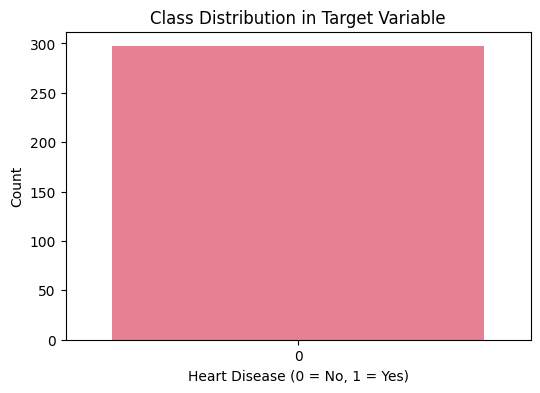

In [40]:
# Step 2.3: Check Class Balance in the Target Variable
class_counts = df['age'].value_counts()
print(f"Class distribution:\n{class_counts}")

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='age', data=df)
plt.title('Class Distribution in Target Variable')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [56]:
# Step 2.4: Perform Feature Selection Based on Correlation or Domain Understanding

# Identify highly correlated features (correlation greater than 0.8)
high_correlation = correlation_matrix[correlation_matrix > 0.8]
print("\nHighly correlated features:")
print(high_correlation)

# For example, we may choose to drop features that are highly correlated
# For illustration, assume 'trestbps' and 'chol' have high correlation (change based on the correlation matrix)
df.drop(columns=['age'], inplace=True)  # Example of dropping a feature



Highly correlated features:
           age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  \
age        NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN   
sex        NaN  1.0  NaN       NaN   NaN  NaN      NaN      NaN    NaN   
cp         NaN  NaN  1.0       NaN   NaN  NaN      NaN      NaN    NaN   
trestbps   NaN  NaN  NaN       1.0   NaN  NaN      NaN      NaN    NaN   
chol       NaN  NaN  NaN       NaN   1.0  NaN      NaN      NaN    NaN   
fbs        NaN  NaN  NaN       NaN   NaN  1.0      NaN      NaN    NaN   
restecg    NaN  NaN  NaN       NaN   NaN  NaN      1.0      NaN    NaN   
thalach    NaN  NaN  NaN       NaN   NaN  NaN      NaN      1.0    NaN   
exang      NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    1.0   
oldpeak    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN   
slope      NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN   
ca         NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN   
thal     

In [58]:
# Step 3.1: Split the data into training and testing sets using stratification
from sklearn.model_selection import train_test_split

# Ensure the split has both classes in both training and test sets by stratifying by 'num'
X = df.drop('age', axis=1)  # Features
y = df['age']  # Target

# Split into training and testing sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the class distribution in the training set
print("Class distribution in training set:")
print(y_train.value_counts())

# Step 3.2: Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
model.fit(X_train, y_train)

# Step 3.3: Print Model Coefficients and Intercept
print("\nModel Coefficients:")
print(model.coef_)

print("\nModel Intercept:")
print(model.intercept_)

# Step 3.4: Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 3.5: Interpret two feature coefficients
feature_names = X.columns
for i in range(2):
    print(f"\nFeature: {feature_names[i]}")
    print(f"Coefficient: {model.coef_[0][i]}")

    # Interpretation
    if model.coef_[0][i] > 0:
        interpretation = "positive effect (increases the likelihood of having heart disease)"
    else:
        interpretation = "negative effect (decreases the likelihood of having heart disease)"

    print(f"Interpretation: A one-unit increase in {feature_names[i]} would have a {interpretation}.")


KeyError: "['age'] not found in axis"